This is a notebook for looking at the effects of ghosts, using the AGC749237 data. The location of that data has been moved to happili-04, so that is where this notebook should be run.
<br><br>
Follow the same reduction as for AGC749237, but leave in channels 16/48 of each subband. I have also copied the crosscal directory of AGC749237 from happili-03 to happili-04 so that I can work on direct comparisons.
<br><br>
On 8 May 2018, I copy ghosts crosscal data to happili-03 to work there because selfcal takes ~1.5 hours on happili-04. So I also want to test how long that takes here. And the answer was the same, so I'm back to happili-04.

In [9]:

#load apercal automatically, not needing to specify my username/path directly
import os;
myusername = os.environ['USER']
if not ('PYTHONPATH' in os.environ and
        '/home/' + myusername + '/apercal' in os.environ['PYTHONPATH']):
      print("WARNING: your apercal directory should be in the $PYTHONPATH")

In [10]:
#set up logging
%config IPCompleter.greedy=True
%matplotlib notebook
import libs.lib as lib
lib.setup_logger('info', logfile='/home/{}/apertif/DATA/logs/ghosts.log'.format(myusername))

root - INFO : Logging started!
root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/adams/apertif/DATA/logs/ghosts.log
root - INFO : tail -n +1 -f /home/adams/apertif/DATA/logs/ghosts.log


In [11]:
import apercal

In [50]:
import sys
sys.path.append('/home/adams/python')
import colors
import subs
import os
import aplpy
import matplotlib.pyplot as plt
%matplotlib inline

cm_rainbow=colors.get_colormap("rainbow")
cm_linear=colors.get_colormap("linear")

In [12]:
cfgfile ='/home/adams/apertif/DATA/cfg/ghosts.cfg'
cfg749237 = '/home/adams/apertif/DATA/cfg/AGC749237.cfg'

In [ ]:
prepare = apercal.prepare(cfgfile)
prepare.show()

In [ ]:
prepare.go()

Inspected calibrator in plotms and it looks good

In [ ]:
preflag = apercal.preflag(cfgfile)
preflag.show()

In [ ]:
#setup to flag channels with ghosts and subband edges
#except only flag subband edges - want to see the effects of ghosts!
nchannel = 11008
a = range(0, nchannel, 64) # the subband edges
b = range(1, nchannel, 64)
c = range(63, nchannel, 64)
#d = range(16, nchannel, 64) # the two ghosts
#e = range(48, nchannel, 64)

l = a + b + c #+ d + e
preflag.preflag_manualflag_channel = ';'.join(str(ch) for ch in l)

preflag.show()


In [ ]:
preflag.manualflag()

In [ ]:
#skip the bandpass step because I don't think it's important with the flagging of subband edges
#curious to see if this will work
#nope - ran much too fast

#this applies a rough bandpass to make sure flagging doesn't take out bandpass shape/effects
preflag.aoflagger_bandpass()

In [ ]:
#and now run aoflagger to get RFI
preflag.aoflagger_flag()

In [ ]:
#inspected in rfigui briefly and looks good, so move on
convert = apercal.convert(cfgfile)
convert.show()

In [ ]:
convert.go()

In [ ]:
ccal = apercal.ccal(cfgfile)
ccal.show()

In [ ]:
ccal.go()

I ran the cells above but have since restarted and cleared the notebook. I'm going to resume redoing selfcal and imaging. My lesson from before was that I did NOT want to do amplitude selfcal - this makes things very bad in the ghost image, which shouldn't be surprising, given that it's false emission.

In [5]:
scal = apercal.scal(cfgfile)
scal.selfcalsubdir = 'scal_noamp_7may'
scal.show()

SELFCAL - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/ghosts.cfg successfully read! ###


SELFCAL
	selfcal_image_imsize = 2049
	selfcal_image_cellsize = 4
	selfcal_refant = 3
	selfcal_splitdata = True
	selfcal_splitdata_chunkbandwidth = 0.02
	selfcal_splitdata_channelbandwidth = 0.001
	selfcal_flagantenna = 
	selfcal_flagline = True
	selfcal_flagline_sigma = 0.5
	selfcal_parametric = False
	selfcal_parametric_skymodel_radius = 0.5
	selfcal_parametric_skymodel_cutoff = 0.8
	selfcal_parametric_skymodel_distance = 30
	selfcal_parametric_solint = 10
	selfcal_parametric_uvmin = 0.5
	selfcal_parametric_uvmax = 1000
	selfcal_parametric_amp = False
	selfcal_standard_majorcycle = 3
	selfcal_standard_majorcycle_function = square
	selfcal_standard_minorcycle = 5
	selfcal_standard_minorcycle_function = square
	selfcal_standard_c0 = 10.0
	selfcal_standard_c1 = 5.0
	selfcal_standard_minorcycle0_dr = 3.0
	selfcal_standard_drinit = 25
	selfcal_standard_dr0 = 2.0
	selfcal_standard_nsigma = 50
	selfcal_standard_uvmin = [0.0, 0.0, 0.0]
	selfcal_standard_uvmax = [3000, 3000, 3000]
	selfcal_sta

In [ ]:
scal.go()

SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########
SELFCAL - INFO : ### Splitting of target data into individual frequency chunks started ###
SELFCAL - INFO : # Applying calibrator solutions to target data before averaging #
SELFCAL - INFO : # Calibrator solutions to target data applied #
SELFCAL - INFO : # Found 1 subband(s) in target data #
SELFCAL - INFO : # Started splitting of subband 0 #
SELFCAL - INFO : # Adjusting chunk size to 0.016796875 GHz for regular gridding of the data chunks over frequency #
SELFCAL - INFO : # Starting splitting of data chunk 0 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 0 to keep bandwidth of chunks equal over the whole bandwidth #
SELFCAL - INFO : # New frequency bin is 0.0010498046875 GHz #
SELFCAL - INFO : # Splitting of data chunk 0 for subband 0 done #
SELFCAL - INFO : # Starting splitting of data chunk 1 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 1 to keep bandwidth of chu

SELFCAL - INFO : # Major/minor cycle 0/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.008608357 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00035730368 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/4 set to 0.005815092325210571 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.005815092325210571 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/4 was set to 0.0011630184650421142 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Res

SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0024006519317626954 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.0004801303863525391 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0022453938 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00030822313 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/3 set to 0.0019205215454101562 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0019205215454101562 Jy/beam created #

SELFCAL - INFO : # Clean threshold at major/minor cycle 1/0 was set to 0.0014806362986564635 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.004711166 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003223472 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 01 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/1 set to 0.0055741601831772744 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0055741601831772744 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/1 was set to 0.001114832036635455 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/1 clea

SELFCAL - INFO : # Cleaned image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0016022627 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00031050137 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 01 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=0.5 minutes for major cycle 02 #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 01 finished #
SELFCAL - INFO : # Standard self-calibration routine for chunk 01 finished #
SELFCAL - INFO : # Starting standard self-calibration routine on frequency chunk 02 #
SELFCAL - INFO : # Theoretical noise for chunk 02 is 3.58e-05 Jy/beam #
SELFCAL - INFO : # Your theoretical noise threshold will be 50 times the theoretical noise corresponding to 0.00179 Jy/beam #
SELFCAL - INFO : # Your dynamic range limits are set to [25.0, 50.0

SELFCAL - INFO : # Peak of the residual image is 0.004754648 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00030322312 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 02 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.003824357604980469 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.003824357604980469 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/3 was set to 0.0007648715209960938 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.0035819504 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003005483 Jy/beam #
SELFC

SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 03 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09451374053955078 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.09451374053955078 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/1 was set to 0.018902748107910157 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.021129834 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00034746726 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 03 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chu

SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 03 finished #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 03 started #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/0 set to 0.00507170706987381 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/0 was set to 0.001014341413974762 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.002973325 Jy/beam #
SELFCAL - INFO : # RMS of the 

SELFCAL - INFO : # Mask with threshold 0.010454296535915798 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.0020908593071831596 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.009268774 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00030727053 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 04 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/4 set to 0.0058805418014526364 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0058805418014526364 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/4 was set 

SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/2 set to 0.0024243900775909426 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0024243900775909426 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.0004848780155181885 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.002432805 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00024491907 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 04 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/3 set

In [12]:
continuum = apercal.continuum(cfgfile)
continuum.selfcalsubdir = 'scal_noamp_7may'
continuum.contsubdir = 'cont_noamp_7may'
#also don't do any beam smoothing
continuum.continuum_image_convolbeam = ''
continuum.show()
continuum.reset()

CONTINUUM - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/ghosts.cfg successfully read! ###
CONTINUUM - WARNING : ### Deleting all continuum data products. ###
CONTINUUM - WARNING : ### Deleteing all parameter file entries for continuum module ###


CONTINUUM
	continuum_image_imsize = 2049
	continuum_image_cellsize = 4
	continuum_image_centre = 
	continuum_image_convolbeam = 
	continuum_image_robust = 
	continuum_majorcycle_function = square
	continuum_minorcycle_function = square
	continuum_minorcycle0_dr = 3.0
	continuum_minorcycle = 5
	continuum_c0 = 10.0
	continuum_c1 = 5.0
	continuum_drinit = 25
	continuum_dr0 = 2.0
	continuum_nsigma = 30
# Parameter file does not have parameter continuum_B00_imcomb_rms #
# Parameter file does not have parameter continuum_B00_minoriterations #
# Parameter file does not have parameter continuum_B00_imagestats #
# Parameter file does not have parameter continuum_B00_residualstats #
# Parameter file does not have parameter continuum_B00_status #
# Parameter file does not have parameter continuum_B00_thresholdtype #
# Parameter file does not have parameter continuum_B00_masklimit #
# Parameter file does not have parameter continuum_B00_cleanlimit #


In [ ]:
continuum.go()

CONTINUUM - INFO : ########## Starting CONTINUUM IMAGING of beam 00 ##########
CONTINUUM - INFO : ### Starting deep continuum imaging of full dataset ###
CONTINUUM - INFO : ### Continuum imaging for chunk 00 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 00 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 01 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 01 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 02 started ###


In [24]:
scal = apercal.scal(cfg749237)
scal.selfcalsubdir = 'scal_noamp_7may'
scal.show()
scal.reset()

SELFCAL - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###
SELFCAL - WARNING : ### Deleting all self-calibrated data. ###


SELFCAL
	selfcal_image_imsize = 2049
	selfcal_image_cellsize = 4
	selfcal_refant = 3
	selfcal_splitdata = True
	selfcal_splitdata_chunkbandwidth = 0.02
	selfcal_splitdata_channelbandwidth = 0.001
	selfcal_flagantenna = 
	selfcal_flagline = True
	selfcal_flagline_sigma = 0.5
	selfcal_parametric = False
	selfcal_parametric_skymodel_radius = 0.5
	selfcal_parametric_skymodel_cutoff = 0.8
	selfcal_parametric_skymodel_distance = 30
	selfcal_parametric_solint = 10
	selfcal_parametric_uvmin = 0.5
	selfcal_parametric_uvmax = 1000
	selfcal_parametric_amp = False
	selfcal_standard_majorcycle = 3
	selfcal_standard_majorcycle_function = square
	selfcal_standard_minorcycle = 5
	selfcal_standard_minorcycle_function = square
	selfcal_standard_c0 = 10.0
	selfcal_standard_c1 = 5.0
	selfcal_standard_minorcycle0_dr = 3.0
	selfcal_standard_drinit = 25
	selfcal_standard_dr0 = 2.0
	selfcal_standard_nsigma = 50
	selfcal_standard_uvmin = [0.0, 0.0, 0.0]
	selfcal_standard_uvmax = [3000, 3000, 3000]
	selfcal_sta

In [25]:
scal.go()

SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########
SELFCAL - INFO : ### Splitting of target data into individual frequency chunks started ###
SELFCAL - INFO : # Applying calibrator solutions to target data before averaging #
SELFCAL - INFO : # Calibrator solutions to target data applied #
SELFCAL - INFO : # Found 1 subband(s) in target data #
SELFCAL - INFO : # Started splitting of subband 0 #
SELFCAL - INFO : # Adjusting chunk size to 0.016796875 GHz for regular gridding of the data chunks over frequency #
SELFCAL - INFO : # Starting splitting of data chunk 0 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 0 to keep bandwidth of chunks equal over the whole bandwidth #
SELFCAL - INFO : # New frequency bin is 0.0010498046875 GHz #
SELFCAL - INFO : # Splitting of data chunk 0 for subband 0 done #
SELFCAL - INFO : # Starting splitting of data chunk 1 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 1 to keep bandwidth of chu

SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.0053255935 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00036400853 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/4 set to 0.005814579129219055 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.005814579129219055 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/4 was set to 0.001162915825843811 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/4 created #
SELFCAL -

SELFCAL - INFO : # Mask with threshold 0.0023999667167663575 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.0004799933433532715 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0019017056 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00031775958 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/3 set to 0.001919973373413086 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.001919973373413086 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/3 was set 

SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.0046599363 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.000323157 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 01 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/1 set to 0.005569236418780159 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.005569236418780159 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/1 was set to 0.0011138472837560317 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Resi

SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0017113916 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.000311813 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 01 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=0.5 minutes for major cycle 02 #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 01 finished #
SELFCAL - INFO : # Standard self-calibration routine for chunk 01 finished #
SELFCAL - INFO : # Starting standard self-calibration routine on frequency chunk 02 #
SELFCAL - INFO : # Theoretical noise for chunk 02 is 3.58e-05 Jy/beam #
SELFCAL - INFO : # Your theoretical noise threshold will be 50 times the theoretical noise corresponding to 0.00179 Jy/beam #
SELFCAL - INFO : # Your dynamic range limits are set to [25.0, 50.0, 100.0] for the major self-calibration cycles #
SELFCAL - INFO : # Maj

SELFCAL - INFO : # RMS of the residual image is 0.00031029814 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 02 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.0038237865447998047 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0038237865447998047 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/3 was set to 0.0007647573089599609 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.0036411465 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00030859865 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 02 

SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09450275421142579 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.09450275421142579 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/1 was set to 0.018900550842285157 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.02138247 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00035224823 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 03 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/2 set to 0.

SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 03 started #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/0 set to 0.005071733891963959 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/0 was set to 0.0010143467783927918 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.0029139938 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002710518 Jy/beam #
SELFCAL - INFO : # Minor self-calibratio

SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.0020911608801947703 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.009261935 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00031187723 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 04 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/4 set to 0.005881389975547791 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.005881389975547791 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/4 was set to 0.0011762779951095582 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/4 clea

SELFCAL - INFO : # Mask threshold for major/minor cycle 2/2 set to 0.0024246673583984374 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0024246673583984374 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.0004849334716796875 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0023946553 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002516556 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 04 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/3 set to 0.00193973388671875 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic 

SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/0 was set to 0.001501779407262802 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.0051569054 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00023584899 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 05 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/1 set to 0.005653757768518785 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.005653757768518785 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/1 was set t

SELFCAL - INFO : # Major/minor cycle 2/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0014615302 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002223093 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 05 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=0.5 minutes for major cycle 02 #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 05 finished #
SELFCAL - INFO : # Standard self-calibration routine for chunk 05 finished #
SELFCAL - INFO : # Starting standard self-calibration routine on frequency chunk 06 #
SELFCAL - INFO : # Theoretical noise for chunk 06 is 3.58e-05 Jy/beam #
SELFCAL - INFO : # Your theoretical noise threshold will be 50 times the theoretical noise corresponding to 0.00179 Jy/beam #
SELFCAL - I

SELFCAL - INFO : # Residual image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0047110366 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00022172106 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 06 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 06 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.0038215232849121094 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0038215232849121094 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/3 was set to 0.0007643046569824219 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.0033320284 Jy/beam #
SEL

SELFCAL - INFO : # RMS of the residual image is 0.00029742153 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 07 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 07 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09206988334655762 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.09206988334655762 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/1 was set to 0.018413976669311525 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.020696232 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00029742165 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 07 finish

SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=3 minutes for major cycle 01 #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 07 finished #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 07 started #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 07 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/0 set to 0.004934032261371612 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/0 was set to 0.0009868064522743224 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/0 created #
SELFCAL - INFO : # Residual image for major/minor 

In [26]:
continuum = apercal.continuum(cfg749237)
continuum.selfcalsubdir = 'scal_noamp_7may'
continuum.contsubdir = 'cont_noamp_7may'
#also don't do any beam smoothing
continuum.continuum_image_convolbeam = ''
continuum.show()

CONTINUUM - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


CONTINUUM
	continuum_image_imsize = 2049
	continuum_image_cellsize = 4
	continuum_image_centre = 
	continuum_image_convolbeam = 
	continuum_image_robust = 
	continuum_majorcycle_function = square
	continuum_minorcycle_function = square
	continuum_minorcycle0_dr = 3.0
	continuum_minorcycle = 5
	continuum_c0 = 10.0
	continuum_c1 = 5.0
	continuum_drinit = 25
	continuum_dr0 = 2.0
	continuum_nsigma = 30


In [27]:
continuum.go()

CONTINUUM - INFO : ########## Starting CONTINUUM IMAGING of beam 00 ##########
CONTINUUM - INFO : ### Starting deep continuum imaging of full dataset ###
CONTINUUM - INFO : ### Continuum imaging for chunk 00 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 00 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 01 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 01 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 02 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 02 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 03 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 03 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 04 started ###
CONTINUUM - INFO : ### All files for continuum imaging available

Also do a parametric selfcal for reference:

In [20]:
scal = apercal.scal(cfg749237)
scal.selfcalsubdir = 'scal_param_7may'
scal.selfcal_parametric = True
scal.show()
scal.reset()

SELFCAL - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###
SELFCAL - WARNING : ### Deleting all self-calibrated data. ###


SELFCAL
	selfcal_image_imsize = 2049
	selfcal_image_cellsize = 4
	selfcal_refant = 3
	selfcal_splitdata = True
	selfcal_splitdata_chunkbandwidth = 0.02
	selfcal_splitdata_channelbandwidth = 0.001
	selfcal_flagantenna = 
	selfcal_flagline = True
	selfcal_flagline_sigma = 0.5
	selfcal_parametric = True
	selfcal_parametric_skymodel_radius = 0.5
	selfcal_parametric_skymodel_cutoff = 0.8
	selfcal_parametric_skymodel_distance = 30
	selfcal_parametric_solint = 10
	selfcal_parametric_uvmin = 0.5
	selfcal_parametric_uvmax = 1000
	selfcal_parametric_amp = False
	selfcal_standard_majorcycle = 3
	selfcal_standard_majorcycle_function = square
	selfcal_standard_minorcycle = 5
	selfcal_standard_minorcycle_function = square
	selfcal_standard_c0 = 10.0
	selfcal_standard_c1 = 5.0
	selfcal_standard_minorcycle0_dr = 3.0
	selfcal_standard_drinit = 25
	selfcal_standard_dr0 = 2.0
	selfcal_standard_nsigma = 50
	selfcal_standard_uvmin = [0.0, 0.0, 0.0]
	selfcal_standard_uvmax = [3000, 3000, 3000]
	selfcal_stan

In [21]:
scal.go()

SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########
SELFCAL - INFO : ### Splitting of target data into individual frequency chunks started ###
SELFCAL - INFO : # Applying calibrator solutions to target data before averaging #
SELFCAL - INFO : # Calibrator solutions to target data applied #
SELFCAL - INFO : # Found 1 subband(s) in target data #
SELFCAL - INFO : # Started splitting of subband 0 #
SELFCAL - INFO : # Adjusting chunk size to 0.016796875 GHz for regular gridding of the data chunks over frequency #
SELFCAL - INFO : # Starting splitting of data chunk 0 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 0 to keep bandwidth of chunks equal over the whole bandwidth #
SELFCAL - INFO : # New frequency bin is 0.0010498046875 GHz #
SELFCAL - INFO : # Splitting of data chunk 0 for subband 0 done #
SELFCAL - INFO : # Starting splitting of data chunk 1 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 1 to keep bandwidth of chu

SELFCAL - INFO : # Starting parametric self calibration routine on chunk 05 #
root - INFO : ### Using standard WSRT beam for calculating apparent fluxes! ###
root - INFO : ### Field seems to have a flux of 0.2727973545522783 Jy ###
root - INFO : ### Found 8 source(s) in the model at a cutoff of 80.0 percent with a total flux of 0.2188525354201944 Jy ###
root - INFO : ### Wrote source textfile to /data/adams/AGC749237/00/scal_param_7may/05/pm/model.txt! ###
SELFCAL - INFO : # Creating model from textfile model.txt for chunk 05 #
SELFCAL - INFO : # Doing parametric self-calibration on chunk 05 with solution interval 10 min and uvrange limits of 0.5~1000 klambda #
SELFCAL - INFO : # Parametric self calibration routine on chunk 05 done! #
SELFCAL - INFO : # Starting parametric self calibration routine on chunk 06 #
root - INFO : ### Using standard WSRT beam for calculating apparent fluxes! ###
root - INFO : ### Field seems to have a flux of 0.2705935695926519 Jy ###
root - INFO : ### Found

SELFCAL - INFO : # Peak of the residual image is 0.004965014 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00032890146 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/1 set to 0.005545129776000976 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.005545129776000976 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/1 was set to 0.0011090259552001952 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.004958205 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00032882957 Jy/beam #
SELFC

SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 00 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=0.5 minutes for major cycle 02 #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 00 finished #
SELFCAL - INFO : # Standard self-calibration routine for chunk 00 finished #
SELFCAL - INFO : # Starting standard self-calibration routine on frequency chunk 01 #
SELFCAL - INFO : # Theoretical noise for chunk 01 is 3.58e-05 Jy/beam #
SELFCAL - INFO : # Your theoretical noise threshold will be 50 times the theoretical noise corresponding to 0.00179 Jy/beam #
SELFCAL - INFO : # Your dynamic range limits are set to [25.0, 50.0, 100.0] for the major self-calibration cycles #
SELFCAL - INFO : # Major self-calibration cycle 0 for frequency chunk 01 started #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 0 are [3.0, 1.5625, 6.25, 14.0625, 25.0] #
SELFCAL - INFO : # Minor self-calibr

SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.003734135055541992 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.003734135055541992 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/3 was set to 0.0007468270111083984 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.0034201194 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00031916995 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 01 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/4 set to 0.0029172930121421814 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic

SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.09400428771972656 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/1 was set to 0.018800857543945313 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.021621322 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00034756426 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 02 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/2 set to 0.02350107192993164 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.02350107192993164 Jy/beam created #
SELFCAL

SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/0 set to 0.0049319694439570105 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/0 was set to 0.0009863938887914021 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.0029811144 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003026039 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 02 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/1 set to 0.00

SELFCAL - INFO : # Residual image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.010207611 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00029236716 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 03 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/4 set to 0.005954106450080872 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.005954106450080872 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/4 was set to 0.0011908212900161744 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0055434555 Jy/beam #
SELFCA

SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.0004789331436157227 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0022984473 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00026982647 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 03 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/3 set to 0.0019157325744628905 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0019157325744628905 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/3 was set to 0.0003831465148925781 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/3 c

SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.005342584 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00026344022 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 04 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/1 set to 0.0056043277067296645 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0056043277067296645 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/1 was set to 0.001120865541345933 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Re

SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.001465194 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00025057755 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 04 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=0.5 minutes for major cycle 02 #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 04 finished #
SELFCAL - INFO : # Standard self-calibration routine for chunk 04 finished #
SELFCAL - INFO : # Starting standard self-calibration routine on frequency chunk 05 #
SELFCAL - INFO : # Theoretical noise for chunk 05 is 3.58e-05 Jy/beam #
SELFCAL - INFO : # Your theoretical noise threshold will be 50 times the theoretical noise corresponding to 0.00179 Jy/beam #
SELFCAL - INFO : # Your dynamic range limits are set to [25.0, 50.0, 100.0] for the major self-calibration cycles #
SELFCAL - INFO : # Ma

SELFCAL - INFO : # RMS of the residual image is 0.00023329639 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 05 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.003784783935546875 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.003784783935546875 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/3 was set to 0.000756956787109375 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.0034537618 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00023117223 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 05 fin

SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 06 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09394417762756348 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.09394417762756348 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/1 was set to 0.018788835525512696 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.021633277 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00026683867 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 06 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 06 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/2 set to 0

SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 06 started #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 06 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/0 set to 0.004912767310937246 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/0 was set to 0.000982553462187449 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.0027198365 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00021287649 Jy/beam #
SELFCAL - INFO : # Minor self-calibratio

SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.002064189698961046 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.007642884 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00022738698 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 07 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 07 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/4 set to 0.005805533528327942 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.005805533528327942 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/4 was set to 0.0011611067056655883 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/4 clean

SELFCAL - INFO : # Mask threshold for major/minor cycle 2/2 set to 0.0023332488536834716 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0023332488536834716 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.0004666497707366943 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0022555392 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00020434138 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 07 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 07 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/3 set to 0.0018665990829467773 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynam

In [22]:
continuum = apercal.continuum(cfg749237)
continuum.selfcalsubdir = 'scal_param_7may'
continuum.contsubdir = 'cont_param_7may'
#also don't do any beam smoothing
continuum.continuum_image_convolbeam = ''
continuum.show()

CONTINUUM - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


CONTINUUM
	continuum_image_imsize = 2049
	continuum_image_cellsize = 4
	continuum_image_centre = 
	continuum_image_convolbeam = 
	continuum_image_robust = 
	continuum_majorcycle_function = square
	continuum_minorcycle_function = square
	continuum_minorcycle0_dr = 3.0
	continuum_minorcycle = 5
	continuum_c0 = 10.0
	continuum_c1 = 5.0
	continuum_drinit = 25
	continuum_dr0 = 2.0
	continuum_nsigma = 30


In [ ]:
continuum.go()

CONTINUUM - INFO : ########## Starting CONTINUUM IMAGING of beam 00 ##########
CONTINUUM - INFO : ### Starting deep continuum imaging of full dataset ###
CONTINUUM - INFO : ### Continuum imaging for chunk 00 started ###


Note that the selfcal seems to be taking a very long time - much more than an hour. I wonder if this is connected to limited performance on happili, and I'm tempted to try copying data to happili-02 or happili-03 and work there as a comparison. Happili-03 is probably good because I already have the comparison good data there.
<br><br>
Parametric selfcal, control dataset, happili-04:<br>
`05/08/2018 06:26:11 PM - SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########`<br>
`05/08/2018 07:51:33 PM - SELFCAL - INFO : ########## SELF CALIBRATION done ##########`
<br><br>
Parametric selfcal, ghosts dataset, happili-03:<br>
`05/08/2018 08:34:06 PM - SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########`<br>
`05/08/2018 10:02:46 PM - SELFCAL - INFO : ########## SELF CALIBRATION done ##########`
<br><br>
So same amount of time. Thus stick with happili-04

In [ ]:
#switch to happili-02 and do parametric selfcal for "ghosts" dataset there to serve as a good comparison

In [13]:
scal = apercal.scal(cfgfile)
scal.selfcalsubdir = 'scal_param_7may'
scal.selfcal_parametric = True
scal.show()
scal.reset()

SELFCAL - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/ghosts.cfg successfully read! ###
SELFCAL - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/ghosts.cfg successfully read! ###
SELFCAL - WARNING : ### Deleting all self-calibrated data. ###
SELFCAL - WARNING : ### Deleting all self-calibrated data. ###


SELFCAL
	selfcal_image_imsize = 2049
	selfcal_image_cellsize = 4
	selfcal_refant = 3
	selfcal_splitdata = True
	selfcal_splitdata_chunkbandwidth = 0.02
	selfcal_splitdata_channelbandwidth = 0.001
	selfcal_flagantenna = 
	selfcal_flagline = True
	selfcal_flagline_sigma = 0.5
	selfcal_parametric = True
	selfcal_parametric_skymodel_radius = 0.5
	selfcal_parametric_skymodel_cutoff = 0.8
	selfcal_parametric_skymodel_distance = 30
	selfcal_parametric_solint = 10
	selfcal_parametric_uvmin = 0.5
	selfcal_parametric_uvmax = 1000
	selfcal_parametric_amp = False
	selfcal_standard_majorcycle = 3
	selfcal_standard_majorcycle_function = square
	selfcal_standard_minorcycle = 5
	selfcal_standard_minorcycle_function = square
	selfcal_standard_c0 = 10.0
	selfcal_standard_c1 = 5.0
	selfcal_standard_minorcycle0_dr = 3.0
	selfcal_standard_drinit = 25
	selfcal_standard_dr0 = 2.0
	selfcal_standard_nsigma = 50
	selfcal_standard_uvmin = [0.0, 0.0, 0.0]
	selfcal_standard_uvmax = [3000, 3000, 3000]
	selfcal_stan

In [14]:
scal.go()

SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########
SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########
SELFCAL - INFO : ### Splitting of target data into individual frequency chunks started ###
SELFCAL - INFO : ### Splitting of target data into individual frequency chunks started ###
SELFCAL - INFO : # Applying calibrator solutions to target data before averaging #
SELFCAL - INFO : # Applying calibrator solutions to target data before averaging #
SELFCAL - INFO : # Calibrator solutions to target data applied #
SELFCAL - INFO : # Calibrator solutions to target data applied #
SELFCAL - INFO : # Found 1 subband(s) in target data #
SELFCAL - INFO : # Found 1 subband(s) in target data #
SELFCAL - INFO : # Started splitting of subband 0 #
SELFCAL - INFO : # Started splitting of subband 0 #
SELFCAL - INFO : # Adjusting chunk size to 0.016796875 GHz for regular gridding of the data chunks over frequency #
SELFCAL - INFO : # Adjusting chunk size to 0.016796875 GHz for

SELFCAL - INFO : # Flagged channel(s) 4 in data chunk 05 #
SELFCAL - INFO : # Flagged channel(s) 4 in data chunk 05 #
SELFCAL - INFO : # Looking through data chunk 06 #
SELFCAL - INFO : # Looking through data chunk 06 #
SELFCAL - INFO : # Found high noise in channel(s) 15 #
SELFCAL - INFO : # Found high noise in channel(s) 15 #
SELFCAL - INFO : # Flagged channel(s) 15 in data chunk 06 #
SELFCAL - INFO : # Flagged channel(s) 15 in data chunk 06 #
SELFCAL - INFO : # Looking through data chunk 07 #
SELFCAL - INFO : # Looking through data chunk 07 #
SELFCAL - INFO : # Found high noise in channel(s) 14 #
SELFCAL - INFO : # Found high noise in channel(s) 14 #
SELFCAL - INFO : # Flagged channel(s) 14 in data chunk 07 #
SELFCAL - INFO : # Flagged channel(s) 14 in data chunk 07 #
SELFCAL - INFO : ### Automatic flagging of HI-line/RFI done ###
SELFCAL - INFO : ### Automatic flagging of HI-line/RFI done ###
SELFCAL - INFO : ### Doing parametric self calibration ###
SELFCAL - INFO : ### Doing para

SELFCAL - INFO : # Doing parametric self-calibration on chunk 04 with solution interval 10 min and uvrange limits of 0.5~1000 klambda #
SELFCAL - INFO : # Doing parametric self-calibration on chunk 04 with solution interval 10 min and uvrange limits of 0.5~1000 klambda #
SELFCAL - INFO : # Parametric self calibration routine on chunk 04 done! #
SELFCAL - INFO : # Parametric self calibration routine on chunk 04 done! #
SELFCAL - INFO : # Starting parametric self calibration routine on chunk 05 #
SELFCAL - INFO : # Starting parametric self calibration routine on chunk 05 #
root - INFO : ### Using standard WSRT beam for calculating apparent fluxes! ###
root - INFO : ### Using standard WSRT beam for calculating apparent fluxes! ###
root - INFO : ### Field seems to have a flux of 0.2727973545522783 Jy ###
root - INFO : ### Field seems to have a flux of 0.2727973545522783 Jy ###
root - INFO : ### Found 8 source(s) in the model at a cutoff of 80.0 percent with a total flux of 0.21885253542019

SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09401176452636718 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.09401176452636718 Jy/beam created #
SELFCAL - INFO : # Mask with threshold 0.09401176452636718 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/1 was set to 0.018802352905273437 Jy/beam #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/1 was set to 0.018802352905273437 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/1 cleaning done #
SELFCAL - INFO : # Major/minor cycle 0/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/1 created #
SELFCAL - INFO : # 

SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.0049795727 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.0049795727 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00031944926 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00031944926 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 00 started #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk

SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 00 started #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/0 set to 0.004922586679458618 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/0 set to 0.004922586679458618 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/0 was set to 0.0009845173358917236 Jy/beam #
SELFCAL - INFO : # Clean th

SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0016176256 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.0016176256 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003076957 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003076957 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 00 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=0.5 minutes for major cycle 02 #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=0.5 minutes for major cycle 02 #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 00 finished #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 00 finished #
SELFCAL - INFO : # Standard self-calibration routine for chunk 00 

SELFCAL - INFO : # Major/minor cycle 0/3 cleaning done #
SELFCAL - INFO : # Major/minor cycle 0/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.00704099 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.00704099 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00033027542 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00033027542 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 01 started #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 01 

SELFCAL - INFO : # RMS of the residual image is 0.0003213804 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 01 started #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 01 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.0037380779266357423 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.0037380779266357423 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0037380779266357423 Jy/beam created #
SELFCAL - INFO : # Mask with threshold 0.0037380779266357423 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/3 was set to 0.0007476155853271485 Jy/beam #
SE

SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.002344184398651123 Jy/beam created #
SELFCAL - INFO : # Mask with threshold 0.002344184398651123 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.0004688368797302246 Jy/beam #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.0004688368797302246 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/2 cleaning done #
SELFCAL - INFO : # Major/minor cycle 2/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0023242454 Jy/beam #
SELFCAL - INFO : # Peak of the residual 

SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 02 started #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09399505615234376 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09399505615234376 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.09399505615234376 Jy/beam created #
SELFCAL - INFO : # Mask with threshold 0.09399505615234376 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/1 was set to 0.018799011230468753 Jy/beam #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/1 was set to 0.018799011230468753 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/1 cleaning done #
SELFCAL - INFO : # Major/minor cycle 0/1 cleaning done #
SELFCAL - INFO : # Cleaned image f

SELFCAL - INFO : # Clean threshold at major/minor cycle 1/0 was set to 0.0014737802743911743 Jy/beam #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/0 was set to 0.0014737802743911743 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.005262879 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.005262879 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003053089 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003053089 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 02 finished #
SELFCAL - INFO : # Minor self-cali

SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 02 finished #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 02 started #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 02 started #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 02 started #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/0 set to 0.00493118812640508 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/0 set to 0.00493118812640508 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask from last minor 

SELFCAL - INFO : # Major/minor cycle 2/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0017884749 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.0017884749 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00029232178 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00029232178 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 02 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 02 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=0.5 minutes for major cycle 02 #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=

SELFCAL - INFO : # Mask with threshold 0.010587494108412001 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.0021174988216824003 Jy/beam #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.0021174988216824003 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/3 cleaning done #
SELFCAL - INFO : # Major/minor cycle 0/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.010165169 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.010165169 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002867533 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002867533 Jy/beam #
SELFCAL - INFO : # Minor self-calibratio

SELFCAL - INFO : # Residual image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0048615737 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.0048615737 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00027285743 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00027285743 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 03 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 03 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 03 started #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.0038233753204345703 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.0038233753204345703 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask threshold set by Dy

SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/2 set to 0.0023947160243988036 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/2 set to 0.0023947160243988036 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0023947160243988036 Jy/beam created #
SELFCAL - INFO : # Mask with threshold 0.0023947160243988036 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.00047894320487976074 Jy/beam #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.00047894320487976074 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/2 cleaning done #
SELFCAL - INFO : # Major/minor cycle 2/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/2 created #
SELFCAL - INFO : # Cleaned image for

SELFCAL - INFO : # RMS of the residual image is 0.0002982073 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002982073 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 04 finished #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 04 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 04 started #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09490876197814942 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09490876197814942 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.09490876197814942 Jy/beam created #
SELFCAL - INFO : # Mask with threshold 0.09490876197814942 Jy/beam created #
SELFCAL - INFO : # Clean threshold at majo

SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/0 was set to 0.0014886750280857087 Jy/beam #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/0 was set to 0.0014886750280857087 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.0053418456 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.005

SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=3 minutes for major cycle 01 #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 04 finished #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 04 finished #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 04 started #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 04 started #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 04 started #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/0 set to 0.004976674417654673 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor c

SELFCAL - INFO : # Clean threshold at major/minor cycle 2/4 was set to 0.0003579999999999999 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/4 cleaning done #
SELFCAL - INFO : # Major/minor cycle 2/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0015376355 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.0015376355 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00024377268 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00024377268 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 04 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 04 finished #
SELFCAL - INFO : # Doing self-calibration with uv

SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.010487812889946832 Jy/beam created #
SELFCAL - INFO : # Mask with threshold 0.010487812889946832 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.0020975625779893663 Jy/beam #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.0020975625779893663 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/3 cleaning done #
SELFCAL - INFO : # Major/minor cycle 0/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.009276283 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.009276283 Jy/beam #
SELFCAL - INFO : # RMS of the residua

SELFCAL - INFO : # Cleaned image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0044678287 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.0044678287 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00023088136 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00023088136 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 05 started #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 05 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.0037859874725341795 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.0

SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 05 started #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 05 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/2 set to 0.0023724651336669922 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/2 set to 0.0023724651336669922 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0023724651336669922 Jy/beam created #
SELFCAL - INFO : # Mask with threshold 0.0023724651336669922 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.00047449302673339847 Jy/beam #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/2 was set to 0.00047449302673339847 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/2 cleaning do

SELFCAL - INFO : # Peak of the residual image is 0.021789618 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.021789618 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002721873 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002721873 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 06 finished #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 06 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 06 started #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 06 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09389311790466309 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09389311790466309 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0938931179046

SELFCAL - INFO : # Mask threshold for major/minor cycle 1/0 set to 0.007348693907260895 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/0 set to 0.007348693907260895 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/0 was set to 0.001469738781452179 Jy/beam #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/0 was set to 0.001469738781452179 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SE

SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 06 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=3 minutes for major cycle 01 #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=3 minutes for major cycle 01 #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 06 finished #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 06 finished #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 06 started #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 06 started #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 06 started #
SELFCAL - INFO : # Minor self

SELFCAL - INFO : # Mask with threshold 0.0017899999999999997 Jy/beam created #
SELFCAL - INFO : # Mask with threshold 0.0017899999999999997 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/4 was set to 0.0003579999999999999 Jy/beam #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/4 was set to 0.0003579999999999999 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/4 cleaning done #
SELFCAL - INFO : # Major/minor cycle 2/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0014952701 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.0014952701 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002115099 Jy/beam #
SELFCAL - INFO : # RMS of the

SELFCAL - INFO : # Mask threshold for major/minor cycle 0/3 set to 0.010314463509453668 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/3 set to 0.010314463509453668 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.010314463509453668 Jy/beam created #
SELFCAL - INFO : # Mask with threshold 0.010314463509453668 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.0020628927018907337 Jy/beam #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.0020628927018907337 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/3 cleaning done #
SELFCAL - INFO : # Major/minor cycle 0/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 

SELFCAL - INFO : # Clean threshold at major/minor cycle 1/2 was set to 0.000930262565612793 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/2 cleaning done #
SELFCAL - INFO : # Major/minor cycle 1/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.004392054 Jy/beam #
SELFCAL - INFO : # Peak of the residual image is 0.004392054 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00021007081 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00021007081 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 07 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 07 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 fo

SELFCAL - INFO : # RMS of the residual image is 0.0002003323 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002003323 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 07 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 07 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 07 started #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 07 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/2 set to 0.002331613540649414 Jy/beam #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/2 set to 0.002331613540649414 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.002331613540649414 Jy/beam created #
SELFCAL - INFO : # Mask with threshold 0.002331613540649414 Jy/beam created #
SELFCAL - INFO : # Clean threshold at 

In [45]:
continuum = apercal.continuum(cfgfile)
continuum.selfcalsubdir = 'scal_param_7may'
continuum.contsubdir = 'cont_param_7may'
#also don't do any beam smoothing
continuum.continuum_image_convolbeam = ''
continuum.show()

CONTINUUM - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/ghosts.cfg successfully read! ###


CONTINUUM
	continuum_image_imsize = 2049
	continuum_image_cellsize = 4
	continuum_image_centre = 
	continuum_image_convolbeam = 
	continuum_image_robust = 
	continuum_majorcycle_function = square
	continuum_minorcycle_function = square
	continuum_minorcycle0_dr = 3.0
	continuum_minorcycle = 5
	continuum_c0 = 10.0
	continuum_c1 = 5.0
	continuum_drinit = 25
	continuum_dr0 = 2.0
	continuum_nsigma = 30


In [46]:
continuum.go()

CONTINUUM - INFO : ########## Starting CONTINUUM IMAGING of beam 00 ##########
CONTINUUM - INFO : ### Starting deep continuum imaging of full dataset ###
CONTINUUM - INFO : ### Continuum imaging for chunk 00 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 00 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 01 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 01 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 02 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 02 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 03 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 03 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 04 started ###
CONTINUUM - INFO : ### All files for continuum imaging available

## So - what I want to do:
- Get beam sizes for different images
- Plot side-by-side comparisons of ghosts vs. non-ghosts
- Look at significance of detection
- Look at noise with (hopefully) higher resolution
- If resolution is stil not high enough, check beam in chunk 00 (lowest frequnecy)

In [47]:
#Set up for getting beam sizes

#exploration in miriad, shows me that I need to to move to directory and then do image/bmaj. 
#I can't give full path to image, unfortunately
#Note that I expect something like 35.3x12.6, based on chunk00

#first, ghosts, noamp selfcal
continuum = apercal.continuum(cfgfile)
continuum.contsubdir = 'cont_noamp_7may'
#move to directory:
subs.managefiles.director(continuum,'ch',continuum.basedir+'00/'+continuum.contsubdir)
print os.getcwd()

gethd=lib.miriad('gethd')
gethd.in_ = 'AGC749237_stack/bmaj'
#gethd.go()
bmaj_rad = gethd.go()
print bmaj_rad
#print float(bmaj_rad[0])
print float(bmaj_rad[0])*206265.

gethd.in_ = 'AGC749237_stack/bmin'
bmin_rad = gethd.go()
print float(bmin_rad[0])*206265.


#then, ghosts, parameteric, noamp selfcal
continuum.contsubdir = 'cont_param_7may'
#move to directory:
subs.managefiles.director(continuum,'ch',continuum.basedir+'00/'+continuum.contsubdir)
print os.getcwd()

gethd.in_ = 'AGC749237_stack/bmaj'
bmaj_rad = gethd.go()
print bmaj_rad
print float(bmaj_rad[0])*206265.

gethd.in_ = 'AGC749237_stack/bmin'
bmin_rad = gethd.go()
print float(bmin_rad[0])*206265.


#and control, noamp selfcal
continuum = apercal.continuum(cfg749237)
continuum.contsubdir = 'cont_noamp_7may'
#move to directory:
subs.managefiles.director(continuum,'ch',continuum.basedir+'00/'+continuum.contsubdir)
print os.getcwd()

gethd=lib.miriad('gethd')
gethd.in_ = 'AGC749237_stack/bmaj'
bmaj_rad = gethd.go()
print bmaj_rad
print float(bmaj_rad[0])*206265.

gethd.in_ = 'AGC749237_stack/bmin'
bmin_rad = gethd.go()
print float(bmin_rad[0])*206265.


#finally, control, parameteric, noamp selfcal
continuum.contsubdir = 'cont_param_7may'
#move to directory:
subs.managefiles.director(continuum,'ch',continuum.basedir+'00/'+continuum.contsubdir)
print os.getcwd()

gethd=lib.miriad('gethd')
gethd.in_ = 'AGC749237_stack/bmaj'
bmaj_rad = gethd.go()
print bmaj_rad
print float(bmaj_rad[0])*206265.

gethd.in_ = 'AGC749237_stack/bmin'
bmin_rad = gethd.go()
print float(bmin_rad[0])*206265.


CONTINUUM - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/ghosts.cfg successfully read! ###


/data/adams/ghosts/00/cont_noamp_7may
['0.0001762433']
36.3528242745


CONTINUUM - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


13.2405752559
/data/adams/ghosts/00/cont_param_7may
['0.0001762433']
36.3528242745
13.2405752559
/data/adams/AGC749237/00/cont_noamp_7may
['0.0001758934']
36.280652151
13.0514983184
/data/adams/AGC749237/00/cont_param_7may
['0.0001758934']
36.280652151
13.0514983184


INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -2.884e-04 [aplpy.core]
INFO: Auto-setting vmax to  3.151e-04 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -2.918e-04 [aplpy.core]
INFO: Auto-setting vmax to  3.158e-04 [aplpy.core]


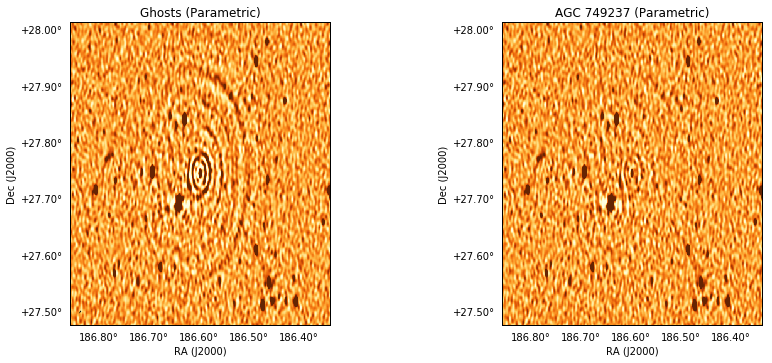

In [51]:
#Do side-by-side comparison plots!
fitsfile_param_ghosts = '/data/adams/ghosts/00/cont_param_7may/AGC749237_stack.fits'
fitsfile_param_control = '/data/adams/AGC749237/00/cont_param_7may/AGC749237_stack.fits'


ra = 186.5975
dec = 27.7456


fig=plt.figure(figsize=(12,6))

f1=aplpy.FITSFigure(fitsfile_param_ghosts,figure=fig,aspect='equal',subplot=[0.1,0.15,0.35,0.7])
f1.recenter(ra,dec, radius=0.23) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear))
#f1.show_contour(rcimage,levels=rc_contours,colors='black')
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
f1.set_title('Ghosts (Parametric)')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(fitsfile_param_control,figure=fig,aspect='equal',subplot=[0.6,0.15,0.35,0.7])
f2.recenter(ra,dec, radius=0.23) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear))
#f2.show_contour(nvss,levels=nvss_contours,colors='black')
f2.tick_labels.set_yformat('ddd.dd')
f2.tick_labels.set_xformat('ddd.dd')
f2.set_title('AGC 749237 (Parametric)')



INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -2.885e-04 [aplpy.core]
INFO: Auto-setting vmax to  3.157e-04 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -2.917e-04 [aplpy.core]
INFO: Auto-setting vmax to  3.159e-04 [aplpy.core]


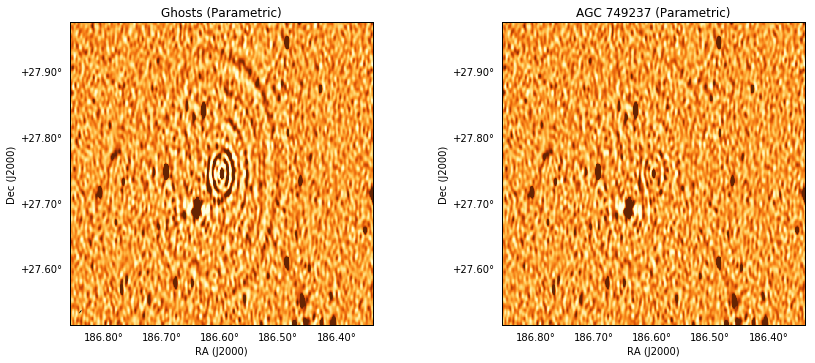

In [52]:
#Do side-by-side comparison plots!
fitsfile_noamp_ghosts = '/data/adams/ghosts/00/cont_noamp_7may/AGC749237_stack.fits'
fitsfile_noamp_control = '/data/adams/AGC749237/00/cont_noamp_7may/AGC749237_stack.fits'


ra = 186.5975
dec = 27.7456


fig=plt.figure(figsize=(12,6))

f1=aplpy.FITSFigure(fitsfile_noamp_ghosts,figure=fig,aspect='equal',subplot=[0.1,0.15,0.35,0.7])
f1.recenter(ra,dec, radius=0.23) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear))
#f1.show_contour(rcimage,levels=rc_contours,colors='black')
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
f1.set_title('Ghosts (Parametric)')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(fitsfile_noamp_control,figure=fig,aspect='equal',subplot=[0.6,0.15,0.35,0.7])
f2.recenter(ra,dec, radius=0.23) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear))
#f2.show_contour(nvss,levels=nvss_contours,colors='black')
f2.tick_labels.set_yformat('ddd.dd')
f2.tick_labels.set_xformat('ddd.dd')
f2.set_title('AGC 749237 (Parametric)')



Can clearly see effects of ghosts - I can probably go ahead and put this in redmine and be done messing around. There's only more thing I want to do, which is make a "high" resolution continuum image of 249237 where I did the amp selfcal to see how that looks.

In [53]:
continuum = apercal.continuum(cfg749237)
continuum.contsubdir = 'cont_amp_highres'
#also don't do any beam smoothing
continuum.continuum_image_convolbeam = ''
continuum.show()

CONTINUUM - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


CONTINUUM
	continuum_image_imsize = 2049
	continuum_image_cellsize = 4
	continuum_image_centre = 
	continuum_image_convolbeam = 
	continuum_image_robust = 
	continuum_majorcycle_function = square
	continuum_minorcycle_function = square
	continuum_minorcycle0_dr = 3.0
	continuum_minorcycle = 5
	continuum_c0 = 10.0
	continuum_c1 = 5.0
	continuum_drinit = 25
	continuum_dr0 = 2.0
	continuum_nsigma = 30


In [ ]:
continuum.go()

CONTINUUM - INFO : ########## Starting CONTINUUM IMAGING of beam 00 ##########
CONTINUUM - INFO : ### Starting deep continuum imaging of full dataset ###
CONTINUUM - INFO : ### Continuum imaging for chunk 00 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 00 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 01 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 01 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 02 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 02 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 03 started ###
CONTINUUM - INFO : ### All files for continuum imaging available. Continuum imaging for chunk 03 successful! ###
CONTINUUM - INFO : ### Continuum imaging for chunk 04 started ###
CONTINUUM - INFO : ### All files for continuum imaging available

In [ ]:
#make just a nice H-alpha RC overlay to focus on that

ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/AGC749237/00/cont_amp_highrs/AGC749237_stack.fits'
halpha = '/data/adams/AGC749237/AGC749237_HA.reg.fits'


rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

rc_contours = [0.0006,0.00075]

fig=plt.figure(figsize=(12,12))

f2=aplpy.FITSFigure(halpha,figure=fig,aspect='equal')
f2.recenter(ra,dec, radius=0.01) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear))
f2.show_contour(rcimage,levels=rc_contours,colors='white',linewidths=3)
f2.set_title(r'AGC\,749237 H$\alpha$ image with Apertif RC overlay',size=18)
f2.axis_labels.set_font(size=20)
f2.tick_labels.set_font(size=18)

plt.savefig('AGC749237_SF.png')

In [ ]:
scal = apercal.scal(cfgfile)

#Based on previous experience with UGC8261, I will start with amplitude selfcal
#I will then check my fluxes against NVSS in the end
scal.selfcal_parametric = True
scal.selfcal_parametric_amp = True
scal.selfcal_standard_amp = True

scal.show()

In [ ]:
scal.go()

In [ ]:
continuum = apercal.continuum(cfgfile)
continuum.show()

In [ ]:
continuum.go()

Chunk 5 was not successful, so everything else died. No in-between images, no final image. Look at selfcal data again.
Okay -- things did go really wrong in that chunk, so maybe it's no surprising that it failed. What if I try again without amp selfcal? Let's do that.

In [ ]:
#Using version 08f5e3b5ec70711185a6ee2887ceb25659e8cfc6


scal = apercal.scal(cfgfile)
scal.selfcalsubdir = 'selfcal_noamp'
scal.show()
scal.reset()

In [ ]:
scal.go()

In [ ]:
#okay - I didn't think length of pathnames shoudl matter, but I'm going to try changing
#Then I'll try reverting to newest version of apercal to see if that was my issue

In [ ]:
scal = apercal.scal(cfgfile)
scal.selfcalsubdir = 'sc_noamp'
scal.show()


In [ ]:
scal.go()

In [ ]:
#return to master for apercal before doing below
#okay - that gave same errors so go back to branch ff6e0cea9ff95958a950e948b3d67a6d0f50090b

continuum = apercal.continuum(cfgfile)
continuum.selfcalsubdir = 'sc_noamp'
continuum.contsubdir = 'cont_noamp'
continuum.show()

In [ ]:
continuum.go()

Now do a comparison where I do flag the channels, and do the same selfcal/ imaging setup. I can do that on happili-03 where the data was originally - it's been flagged there. I just have to rerun selfcal. But I would rather have everything in the same place (easier to work with), so copy crosscal directory to happili-04

In [ ]:
cfg249237 ='/home/adams/apertif/DATA/cfg/AGC749237.cfg'

In [ ]:
scal = apercal.scal(cfg249237)
scal.selfcalsubdir = 'sc_noamp'
scal.show()

scal.reset()


In [ ]:
scal.go()

In [ ]:

continuum = apercal.continuum(cfgfile)
continuum.selfcalsubdir = 'sc_noamp'
continuum.contsubdir = 'cont_noamp'
continuum.show()

In [ ]:
continuum.go()

In [ ]:
cfgfile ='/home/adams/apertif/DATA/cfg/AGC749237.cfg'
continuum = apercal.continuum(cfgfile)
continuum.selfcalsubdir = 'sc_noamp'
continuum.contsubdir = 'cont_beam'
continuum.continuum_image_convolbeam = ''
#continuum.continuum_B00_minoriterations = ''
continuum.show()

In [ ]:
continuum.go()

In [ ]:

#first, need to primary beam correct continuum image (comparison to NVSS) and export to fits:
linmos = lib.miriad('linmos')
linmos.in_ = '/data/adams/apertif/AGC749237/00/continuum/AGC749237_stack'
linmos.cutoff = 0.3
linmos.out = '/data/adams/apertif/AGC749237/AGC749237_RC'
linmos.go()


In [ ]:
#Now get a fits image so that I can plot and do fun things:
fits = lib.miriad('fits')
fits.in_ = '/data/adams/apertif/AGC749237/AGC749237_RC'
fits.op = "xyout"
fits.out = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
fits.go()

In [ ]:
#load my python modules - colors!
import sys
sys.path.append('/home/adams/python')
import colors
import aplpy
#Yay! There is aplpy

import numpy as np
import matplotlib.pyplot as plt

cm_rainbow=colors.get_colormap("rainbow")
cm_linear=colors.get_colormap("linear")

#to be able to use latex in image text
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [ ]:
%matplotlib inline

In [ ]:
#Now I can work on plotting!
#Plus also comparing to NVSS

#First a quick plot: RC image,  plus Halpha image with RC overlay
#set coordinates of source:
ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'


rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

fig=plt.figure(figsize=(12,6))

f1=aplpy.FITSFigure(rcimage,figure=fig,aspect='equal',subplot=[0.1,0.15,0.3,0.7])
f1.recenter(ra,dec, radius=0.2) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear))
f1.show_contour(rcimage,levels=rc_contours,colors='black')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(halpha,figure=fig,aspect='equal',subplot=[0.6,0.15,0.3,0.7])
f2.recenter(ra,dec, radius=0.02) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear))
f2.show_contour(rcimage,levels=rc_contours,colors='black')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
#f2.add_beam(rcimage)
#f2.beam.hide()
#f2.beam.set_edgecolor('black')
#f2.beam.set_facecolor('none')
#f2.beam.show(facecolor='none')
#f2.beam.set_hatch('///')
#f2.tick_labels.set_yformat('ddd.dd')
#f2.tick_labels.set_xformat('ddd.dd')
#f2.add_colorbar()
#f2.colorbar.show()
#f2.colorbar.set_axis_label_text(r'Jy')
#f2.colorbar.set_axis_label_font(size=18, weight='bold')



In [ ]:
#Now look at NVSS vs Apertif data
#First just plot some comparisons
#Images for both, with contours from other
#Set contours at same absolute level

#Then would like to do a direct source comparison
#talk to Thijs about what he's done

ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'
nvss = '/data/adams/apertif/AGC749237/AGC749237_NVSS.fits'

rc_contours = np.array([3,10]) * 0.2e-3 #0.2 mJy is noise

nvss_contours = np.array([3,10]) * 0.4e-3 #Rms in NVSS images is ~2x

contours = [0.005,0.01,0.05]  #start at 50 mJy and play with contours by hand

fig=plt.figure(figsize=(12,6))

f1=aplpy.FITSFigure(rcimage,figure=fig,aspect='equal',subplot=[0.1,0.15,0.3,0.7])
f1.recenter(ra,dec, radius=0.23) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f1.show_contour(rcimage,levels=rc_contours,colors='black')
f1.show_contour(rcimage,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
f1.set_title('Apertif')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(nvss,figure=fig,aspect='equal',subplot=[0.6,0.15,0.3,0.7])
f2.recenter(ra,dec, radius=0.23) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f2.show_contour(nvss,levels=nvss_contours,colors='black')
f2.show_contour(nvss,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
#f2.add_beam()
#f2.beam.hide()
#f2.beam.set_edgecolor('black')
#f2.beam.set_facecolor('none')
#f2.beam.show(facecolor='none')
#f2.beam.set_hatch('///')
f2.tick_labels.set_yformat('ddd.dd')
f2.tick_labels.set_xformat('ddd.dd')
f2.set_title('NVSS')



In [ ]:
#want to roughly get flux of source.
#Zoom in in kvis and do s to get max value - should be flux (peak flux is flux, I think/hope)
#answer is: 0.76 mJy, so almost 4sigm (3.8)

In [ ]:
#make just a nice H-alpha RC overlay to focus on that

ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'


rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

rc_contours = [0.0006,0.00075]

fig=plt.figure(figsize=(12,12))

f2=aplpy.FITSFigure(halpha,figure=fig,aspect='equal')
f2.recenter(ra,dec, radius=0.01) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear))
f2.show_contour(rcimage,levels=rc_contours,colors='white',linewidths=3)
f2.set_title(r'AGC\,749237 H$\alpha$ image with Apertif RC overlay',size=18)
f2.axis_labels.set_font(size=20)
f2.tick_labels.set_font(size=18)

plt.savefig('AGC749237_SF.png')

In [ ]:
ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'
nvss = '/data/adams/apertif/AGC749237/AGC749237_NVSS.fits'

rc_contours = np.array([3,10]) * 0.2e-3 #0.2 mJy is noise

nvss_contours = np.array([3,10]) * 0.4e-3 #Rms in NVSS images is ~2x

contours = [0.01]  #start at 50 mJy and play with contours by hand

fig=plt.figure(figsize=(15,6))

f1=aplpy.FITSFigure(rcimage,figure=fig,aspect='equal',subplot=[0.1,0.15,0.25,0.7])
f1.recenter(ra,dec, radius=0.2) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f1.show_contour(rcimage,levels=rc_contours,colors='black')
f1.show_contour(rcimage,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
f1.set_title('Apertif')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(nvss,figure=fig,aspect='equal',subplot=[0.4,0.15,0.25,0.7])
f2.recenter(ra,dec, radius=0.2) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f2.show_contour(nvss,levels=nvss_contours,colors='black')
f2.show_contour(nvss,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
#f2.add_beam()
#f2.beam.hide()
#f2.beam.set_edgecolor('black')
#f2.beam.set_facecolor('none')
#f2.beam.show(facecolor='none')
#f2.beam.set_hatch('///')
f2.tick_labels.set_yformat('ddd.dd')
f2.tick_labels.set_xformat('ddd.dd')
f2.set_title('NVSS')

rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

rc_contours = [0.0006,0.00075]



f3=aplpy.FITSFigure(halpha,figure=fig,aspect='equal',subplot=[0.7,0.15,0.25,0.7])
f3.recenter(ra,dec, radius=0.01) 
f3.show_colorscale(cmap=plt.get_cmap(cm_linear))
f3.show_contour(rcimage,levels=rc_contours,colors='white',linewidths=3)
f3.set_title(r'AGC\,749237 H$\alpha$ image with Apertif RC overlay')
#f3.axis_labels.set_font(size=20)
#f3.tick_labels.set_font(size=18)
f3.tick_labels.set_yformat('ddd.dd')
f3.tick_labels.set_xformat('ddd.dd')


plt.savefig('agc749237.png')

In [ ]:
#Now I would like to actually measure continuum sources
#Both for comparison but also because I want a good measure of the flux of my "detection"

#want to use PyBDSF